In [1]:
import sys
from os.path import expanduser, join
home = expanduser("~")
sys.path.append(join(home, 'Repositories/QuREBB'))

import numpy as np
import matplotlib.pyplot as plt
import lib.protocol as protocol
from protocols.tutorial_protocols import ProtocolA, ProtocolB, ProtocolC

In [2]:
save_path = "simulations_preprint/"

common_params = {
    'gamma_dephasing': 30.5e6,
    'splitting': 1e9,
    'DW': 0.7,
    'QE': 0.2,
    'link_loss': 0.99,
    'insertion_loss': 0.5,
    'dim': 3,
    'dc_rate': 0,
    'ideal': False
}

projector_params = {
    'f_operation': 0e9,
    'delta': 0e9,
    'kappa_r': 21.8e9/2,
    'kappa_t': 21.8e9/2, 
    'gamma': 92.5e6,
    'g': 8.38e9,
    'dc_rate': 0.000,
}

emission_params = {
    'f_operation': 0e9,
    'delta': 0e9,
    'kappa_in': 240e9,
    'kappa_loss': 89e9, 
    'gamma': 100e6,
    'g': 6.81e9,
    'alpha': 0.1
}
projector_params.update(common_params)
emission_params.update(common_params)

# Simulate Basic Protocols

## Protocol A

In [113]:
sweep_params_emission ={   
    'alpha' : np.linspace(0.0000001, 0.3, 500)
}

In [114]:
ps_A = protocol.ProtocolSweep(ProtocolA, emission_params, sweep_params_emission, save_results=True, save_folder=save_path, save_name='ProtocolA')

In [115]:
ps_A.run()

Sweep time with multi was 33.015 s


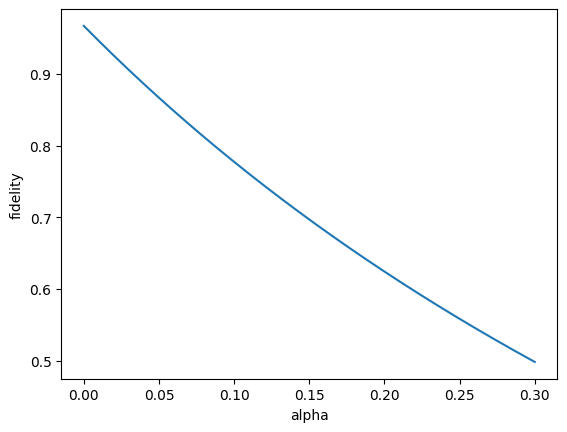

In [116]:
ps_A.dataset.fidelity.plot()

In [117]:
ps_A.generate_fidelity_rate_curve()

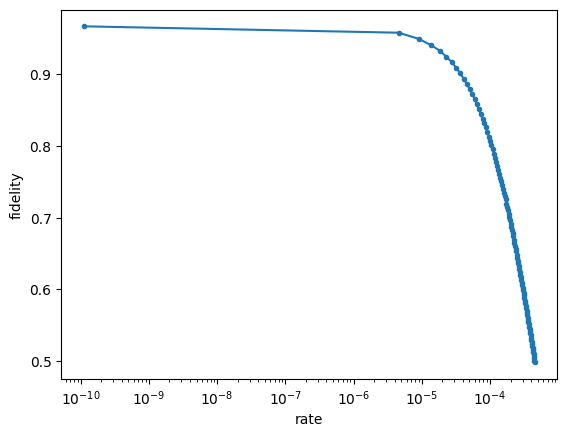

In [118]:
ps_A.dataset_fidelity_rate.fidelity.plot(xscale='log', marker='.')

## Protocol B

In [119]:
sweep_params_projector ={
    
    'delta': np.linspace(0e9,120e9, int(60)),
    
    'f_operation': np.linspace(-18e9,0e9, int(1000)),
}

In [120]:
ps_B = protocol.ProtocolSweep(ProtocolB, projector_params, sweep_params_projector,save_results=True, save_folder=save_path, save_name='ProtocolB')

In [121]:
ps_B.run()

Sweep time with multi was 11629.121 s


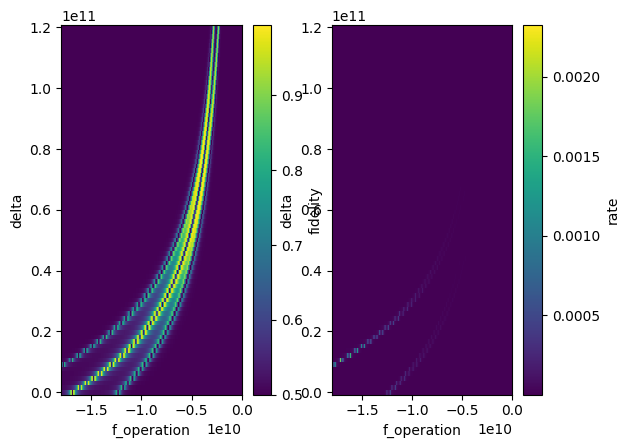

In [122]:
fig, ax = plt.subplots(1,2)
ps_B.dataset.fidelity.plot(ax=ax[0])
ps_B.dataset.rate.plot(ax=ax[1])

In [123]:
ps_B.generate_fidelity_rate_curve()

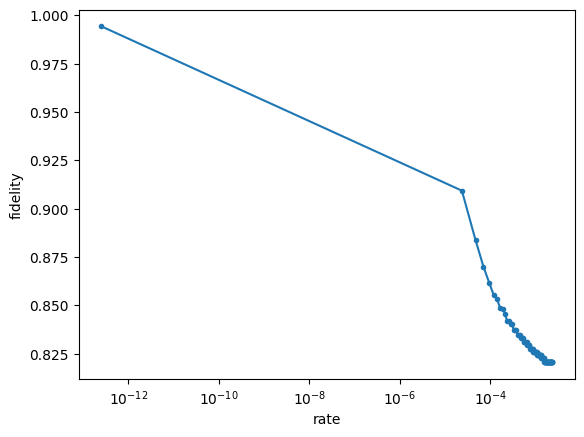

In [124]:
ps_B.dataset_fidelity_rate.fidelity.plot(xscale='log', marker='.')

## Protocol C

In [125]:
ps_C  = protocol.ProtocolSweep(ProtocolC, projector_params, sweep_params_projector, save_results=True, save_folder=save_path, save_name='ProtocolC')

In [126]:
ps_C.run()

Sweep time with multi was 5771.755 s


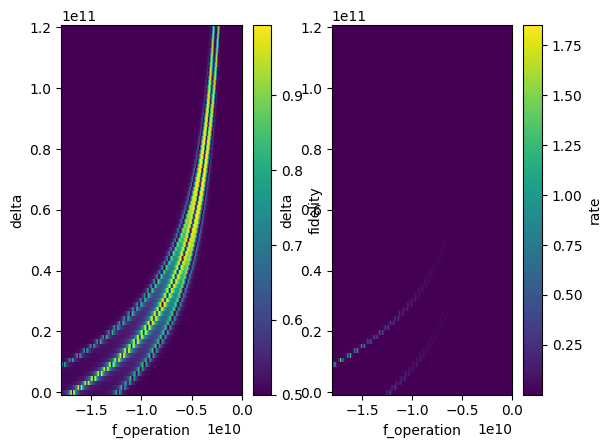

In [127]:
fig, ax = plt.subplots(1,2)
ps_C.dataset.fidelity.plot(ax=ax[0])
ps_C.dataset.rate.plot(ax=ax[1])

In [144]:
ps_C.dataset_fidelity_rate.sel(rate=1.85, method='nearest')

<xarray.Dataset>
Dimensions:      ()
Coordinates:
    delta        float64 9.114e+09
    f_operation  float64 -1.768e+10
    rate         float64 1.851
Data variables:
    fidelity     float64 0.8206
Attributes: (12/13)
    kappa_r:          10900000000.0
    kappa_t:          10900000000.0
    gamma:            92500000.0
    g:                8380000000.0
    dc_rate:          0
    gamma_dephasing:  30500000.0
    ...               ...
    DW:               0.7
    QE:               0.2
    link_loss:        0.99
    insertion_loss:   0.5
    dim:              3
    ideal:            False

In [128]:
ps_C.generate_fidelity_rate_curve()

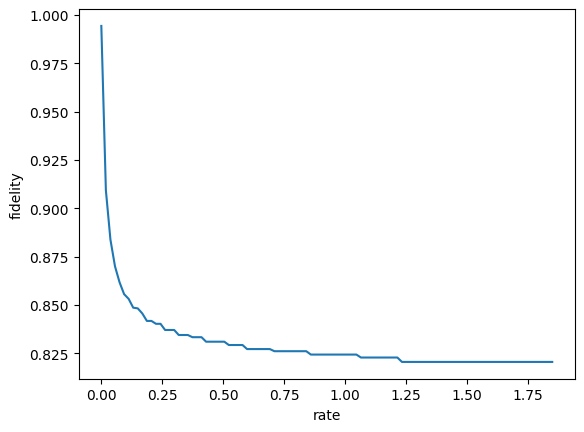

In [140]:
ps_C.dataset_fidelity_rate.fidelity.plot(xscale='linear')

## Protocol C with WCS

In [ ]:
sweep_params_wcs ={
    'delta': np.linspace(0e9,120e9, int(30)),
    'f_operation': np.linspace(-15e9,1e9, int(501)),
    'alpha': np.linspace( np.sqrt(0.0001) , np.sqrt(2.) , int(10))
}

projector_params.update("dim", 4)

In [ ]:
ps_C_wcs  = protocol.ProtocolSweep(ProtocolC, projector_params, sweep_params_wcs)

In [ ]:
ps_C_wcs.run()

In [ ]:
ps_C_wcs.dataset.fidelity.plot()

# Plotting

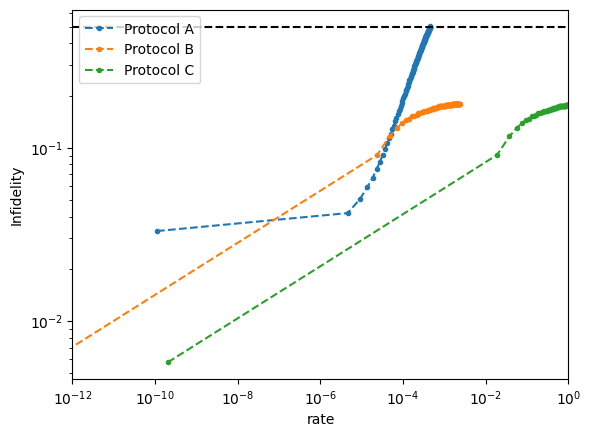

In [139]:
fig, ax = plt.subplots()

(1-ps_A.dataset_fidelity_rate.fidelity).plot(ax=ax, label='Protocol A', marker='.', linestyle='--')
(1-ps_B.dataset_fidelity_rate.fidelity).plot(ax=ax, label='Protocol B', marker='.', linestyle='--')
(1-ps_C.dataset_fidelity_rate.fidelity).plot(ax=ax, label='Protocol C', marker='.', linestyle='--')


ax.hlines(0.5, 1e-12,1, color='k', linestyle='--')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-12, 1)
ax.set_ylabel('Infidelity')
plt.legend(loc=2)

In [61]:
print(np.max(ps_A.dataset.fidelity.values))
print(np.max(ps_B.dataset.fidelity.values))
print(np.max(ps_C.dataset.fidelity.values))

0.9670103346269597
0.9941688084028155
0.9941688117947478


# Testing

In [3]:
sweep_params={'f_operation': np.linspace(-10e9, 10e9, 5), "delta": np.linspace(-10e11, 10e11, 5)}

In [3]:
sweep_params ={
    
    'delta': np.linspace(-100e9,100e9, int(20)),
    
    'f_operation': np.linspace(-15e9,15e9, int(100)),
}

In [4]:
ps = protocol.ProtocolSweep(ProtocolC, projector_params, sweep_params)

In [5]:
ps.run()

Sweep time with multi was 126.136 s


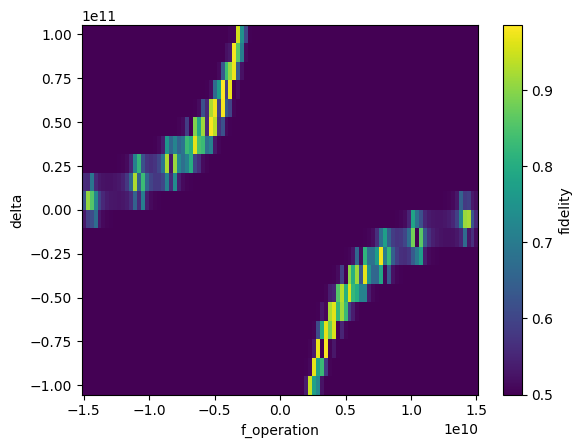

In [6]:
ps.dataset.fidelity.plot()

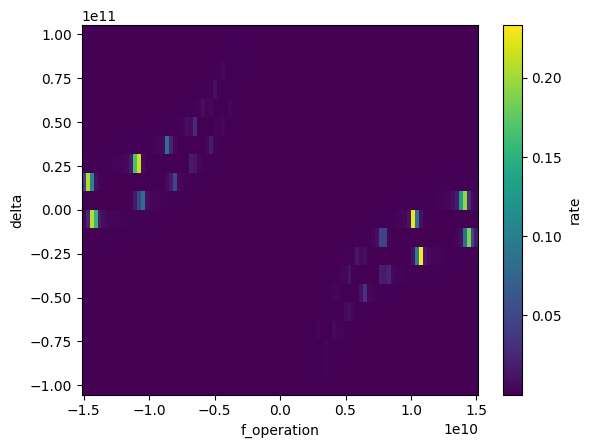

In [7]:
ps.dataset.rate.plot()

In [15]:
ps.generate_fidelity_rate_curve()

In [16]:
ps.dataset_fidelity_rate

<xarray.Dataset>
Dimensions:      (rate: 100)
Coordinates:
    delta        (rate) float64 6.667e+10 7.778e+10 ... 2.222e+10 2.222e+10
    f_operation  (rate) float64 -4.01e+09 -4.01e+09 ... -1.241e+10 -1.241e+10
  * rate         (rate) float64 2.759e-09 0.001717 0.003435 ... 0.1683 0.17
Data variables:
    fidelity     (rate) float64 0.988 0.9831 0.9633 ... 0.7184 0.7184 0.7184
Attributes: (12/13)
    kappa_r:          10900000000.0
    kappa_t:          10900000000.0
    gamma:            92500000.0
    g:                8380000000.0
    dc_rate:          0
    gamma_dephasing:  30500000.0
    ...               ...
    DW:               0.7
    QE:               0.2
    link_loss:        0.99
    insertion_loss:   0.5
    dim:              3
    ideal:            False

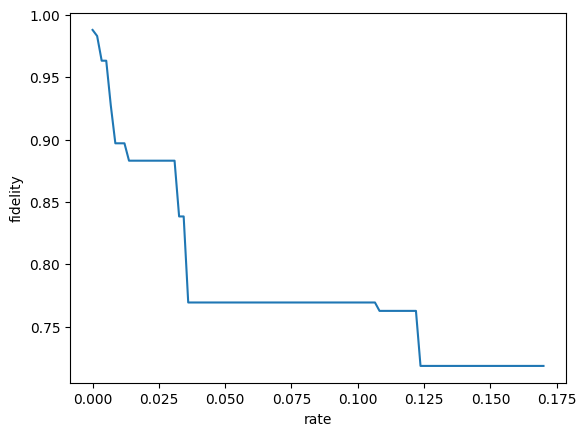

In [17]:
ps.dataset_fidelity_rate.fidelity.plot()

In [13]:
ps.save_folder = "~/Desktop/simulation_datasets"

In [14]:
ps.save_dataset()

In [15]:
protocol.load_dataset("~/Desktop/simulation_datasets/20231006-153749-225-dataset.hdf5").attrs

{'kappa_r': 10900000000.0,
 'kappa_t': 10900000000.0,
 'gamma': 92500000.0,
 'g': 8380000000.0,
 'dc_rate': 0,
 'gamma_dephasing': 30500000.0,
 'splitting': 1000000000.0,
 'DW': 0.7,
 'QE': 0.2,
 'link_loss': 0.99,
 'insertion_loss': 0.5,
 'dim': 3,
 'ideal': False}